In [ ]:
# Import drive to provide google colab with access to your google drive
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install contextily

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gpd
import contextily as ctx
import rasterio as rio
from rasterio import plot
plt.rcParams['figure.figsize'] = [10, 8]

In [ ]:
import zipfile
import os

Task 1: Data Exploration and loading files

In [ ]:

# Upload dataset to Colab
ChicagoDataset = 'content/drive/My Drive/GG3209Lab2Data/'

In [ ]:
# Ensure the output directory exists
output_dir = '/content/drive/My Drive/GG3209Lab2Data/'
os.makedirs(output_dir, exist_ok=True)

In [ ]:
# Define the dataset
ChicagoDataset1 = gpd.read_file('/content/drive/My Drive/GG3209Lab2Data/Chicago_parcels.shp')

Task 2: Display the first few rows of the dataset. Investigate the available attributes and their data types

In [ ]:
# Task 2: Display first rows of dataset and investigate attributes and their data types
ChicagoDataset1.head(10)

,POLY_ID,ID,AREA,PIN_OLD,PIN,geometry,latitude,longitude
0,1,93,291771.353794,836300010,836300010,"POLYGON ((1091182.694 1942890.287, 1091173.159...",1.943042e+06,1.091780e+06
1,2,94,3671.035628,836300011,836300011,"POLYGON ((1092430.298 1943191.955, 1092463.452...",1.943134e+06,1.092427e+06
2,3,96,447996.710787,836300013,836300013,"POLYGON ((1092323.996 1942962.61, 1092301.306 ...",1.942695e+06,1.091688e+06
3,4,95,159742.031513,836300012,836300012,"POLYGON ((1092024.119 1942447.762, 1091997.19 ...",1.942343e+06,1.091538e+06
4,5,92,208978.919092,836300009,836300009,"POLYGON ((1091970.533 1942338.191, 1091929.082...",1.942083e+06,1.091543e+06
5,6,98,57591.174418,836301007,836301007,"POLYGON ((1091889.266 1942159.981, 1091833.063...",1.941893e+06,1.091601e+06
6,7,97,444691.742195,836301003,836301003,"POLYGON ((1091753.543 1941824.459, 1091716.52 ...",1.941260e+06,1.091416e+06
7,8,5,871820.670467,836100006,836100006,"POLYGON ((1092172.233 1942219.598, 1092135.727...",1.942242e+06,1.092710e+06
8,9,7,27125.629361,836101008,836101008,"POLYGON ((1092423.468 1945012.166, 1092400.259...",1.945402e+06,1.092429e+06
9,10,17,366629.628533,836101028,836101028,"POLYGON ((1092434.77 1945796.435, 1092773.374 ...",1.945349e+06,1.092673e+06


In [ ]:
# Find the available attributes by finding the names of the columns
ChicagoDataset1.columns

Index(['POLY_ID', 'ID', 'AREA', 'PIN_OLD', 'PIN', 'geometry', 'latitude',
       'longitude'],
      dtype='object')

The available attributes are Poly_ID, ID, Area, Pin_Old, Pin, geometry, longitude and latitude. Besides longitude and latitude, which are spatial attributes, all of the attributes are integer data types.


**Task 3: Create a map to visualize the spatial distribution of tax parcel polygons in Chicago using the lonboard libary and SolidPolygonLayer to render polygons**

In [ ]:
# Install lonboard geopandas and shapely
!pip install lonboard geopandas shapely

In [ ]:
# Import Libraries
import lonboard
from shapely.geometry import Polygon
import geopandas as gpd
from lonboard import Map, SolidPolygonLayer
import seaborn as sns

<Axes: >

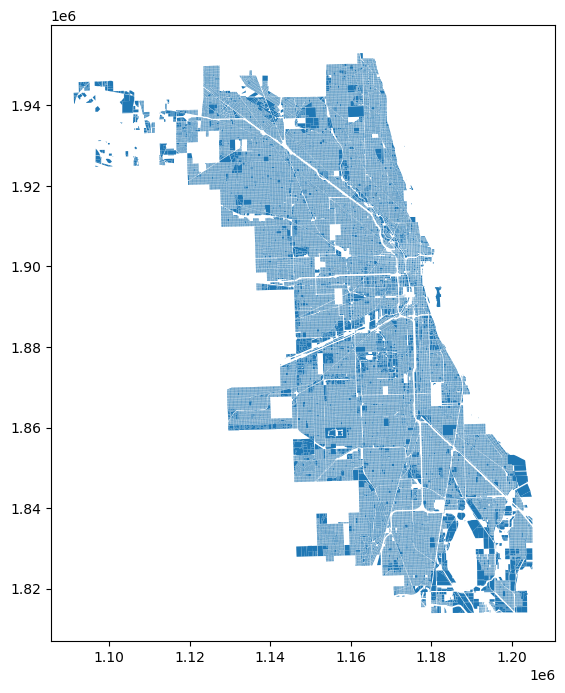

In [ ]:
# Display map from the Chicago Parcels dataframe
ChicagoDataset1 = gpd.read_file('/content/drive/My Drive/GG3209Lab2Data/Chicago_parcels.shp')
ChicagoDataset1.plot()


Task 4: Correlation Analysis - exploring correlations between spatial attributes (longitude and latitude) and numerical attributes

In [ ]:
# Get info about the GeoDataFrame
ChicagoDataset1.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 592521 entries, 0 to 592520
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   POLY_ID   592521 non-null  int32   
 1   ID        592521 non-null  int64   
 2   AREA      592521 non-null  float64 
 3   PIN_OLD   592521 non-null  int64   
 4   PIN       592521 non-null  int64   
 5   geometry  592521 non-null  geometry
dtypes: float64(1), geometry(1), int32(1), int64(3)
memory usage: 24.9 MB


In [ ]:
# Get statistics for numerical types
print(ChicagoDataset1.describe())

             POLY_ID             ID           AREA       PIN_OLD           PIN
count  592521.000000  592521.000000  592521.000000  5.925210e+05  5.925210e+05
mean   296261.000000  296547.003929       0.000060  1.013798e+09  9.918984e+08
std    171046.223762  171071.776698       0.001704  1.426036e+09  1.448937e+09
min         1.000000       1.000000       0.000000 -2.147484e+09 -2.147484e+09
25%    148131.000000  148426.000000       0.000000  1.306111e+09  1.305426e+09
50%    296261.000000  296556.000000       0.000000  1.433316e+09  1.433303e+09
75%    444391.000000  444690.000000       0.000000  1.914209e+09  1.914209e+09
max    592521.000000  592849.000000       0.370000  2.132213e+09  2.132214e+09


In [ ]:
# Find latitude and longitude
ChicagoDataset1['latitude'] = ChicagoDataset1.geometry.centroid.y
ChicagoDataset1['longitude'] = ChicagoDataset1.geometry.centroid.x

# View longitude and latitude in the ChicagoDataset1
print(ChicagoDataset1['latitude'].head())
print(ChicagoDataset1['longitude'].head())


0    1.943042e+06
1    1.943134e+06
2    1.942695e+06
3    1.942343e+06
4    1.942083e+06
Name: latitude, dtype: float64
0    1.091780e+06
1    1.092427e+06
2    1.091688e+06
3    1.091538e+06
4    1.091543e+06
Name: longitude, dtype: float64


In [ ]:
# Explore numerical attributes
ChicagoDataset1['AREA'] = ChicagoDataset1.area
print(ChicagoDataset1['AREA'].head())

0    291771.353794
1      3671.035628
2    447996.710787
3    159742.031513
4    208978.919092
Name: AREA, dtype: float64


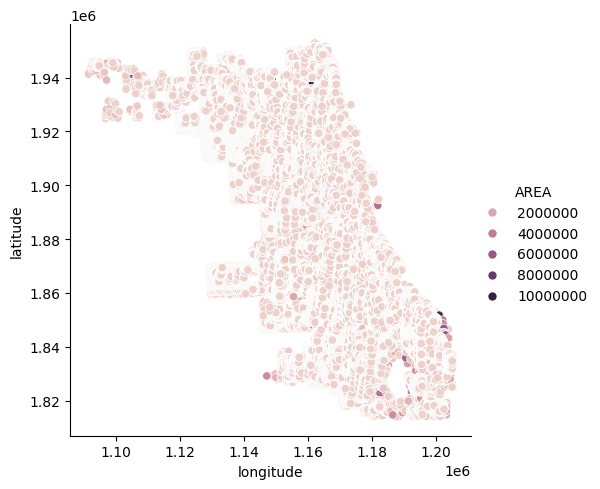

In [ ]:
# Create a scatterplot comparing latitude and longitude with area
sns.relplot(x=ChicagoDataset1['longitude'], y=ChicagoDataset1['latitude'], hue=ChicagoDataset1['AREA'])


Most of the tax parcels have an area below 2000000, and the areas with larger tax parcels are mostly concentrated in the South East areas of Chicago.

**Task 5: K-Means Clustering: implement K-Means clustering with different values of n_clusters**

**Task 6: Visualize the clustering results for each values of n_clusters, using multiple lonboard maps and customized color ramps**

In [ ]:
# Initialize centroids for k-means clustering

def initialize_centroids(ChicagoDataset1, k):
    # Randomly select k data points as initial centroids
    indices = np.random.choice(len(ChicagoDataset1), k, replace=False)
    centroids = ChicagoDataset1[indices]
    return centroids

In [ ]:
# Assign clusters for k-means clustering

def assign_to_clusters(ChicagoDataset1, centroids):
    # Compute distances from each data point to each centroid, linalg is a popular way to do it, find out more in the numpy documentation.
    distances = np.linalg.norm(ChicagoDataset1[:, np.newaxis] - centroids, axis=2)

    # Assign each data point to the cluster of the nearest centroid
    clusters = np.argmin(distances, axis=1)
    return clusters

In [ ]:
# update centroids for k-means clustering

def update_centroids(ChicagoDataset1, clusters, k):
    # Update centroids based on the mean of data points in each cluster
    centroids = np.array([ChicagoDataset1[clusters == i].mean(axis=0) for i in range(k)])
    return centroids

In [ ]:
# intialize centroids fro k-means clustering and max iterations

def k_means(ChicagoDataset1, k, max_iterations=100):
    # Step 1: Initialize centroids
    centroids = initialize_centroids(ChicagoDataset1, k) #See how I can call a function inside another one.

    for iteration in range(max_iterations):
        # Assign data points to clusters
        clusters = assign_to_clusters(ChicagoDataset1, centroids) # again in here.

        # Update centroids
        new_centroids = update_centroids(ChicagoDataset1, clusters, k)

        # Check for convergence (Again optional but just in case)
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids #Is this part of the loop?, what am I doing here, can you describe?


    return clusters, centroids

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import geopandas as gpd
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt
import shapely
import folium
import seaborn as sns
from lonboard import Map, ScatterplotLayer

Following Map: K-Means Clustering for Chicago Tax Parcels with 3 n clusters

<Axes: >

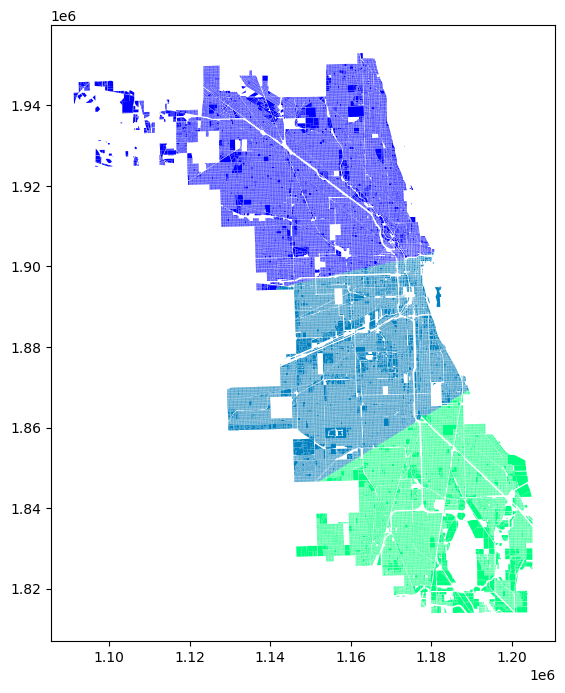

In [ ]:
kmeans_3 = KMeans(n_clusters=3, random_state=42)
ChicagoDataset1['kmeans_cluster_3'] = kmeans_3.fit_predict(ChicagoDataset1[['latitude', 'longitude']])
ChicagoDataset1.plot(column='kmeans_cluster_3', categorical=True, figsize=(8,8), cmap='winter')


Following Map: K-Means Clustering for Chicago Tax Parcels with 4 n clusters

<Axes: >

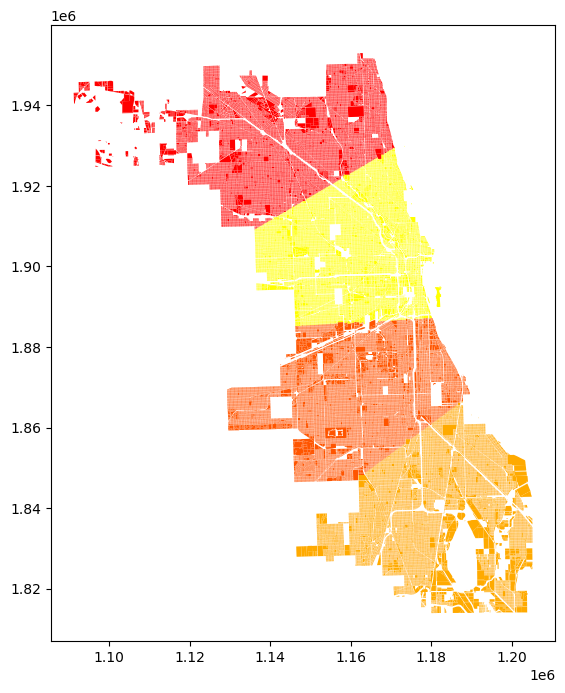

In [ ]:
kmeans_4 = KMeans(n_clusters=4, random_state=42)
ChicagoDataset1['kmeans_cluster_4'] = kmeans_4.fit_predict(ChicagoDataset1[['latitude', 'longitude']])
ChicagoDataset1.plot(column='kmeans_cluster_4', categorical=True, figsize=(8,8), cmap='autumn')

Following Map: K-Means Clustering for Chicago Tax Parcels with 5 n clusters

<Axes: >

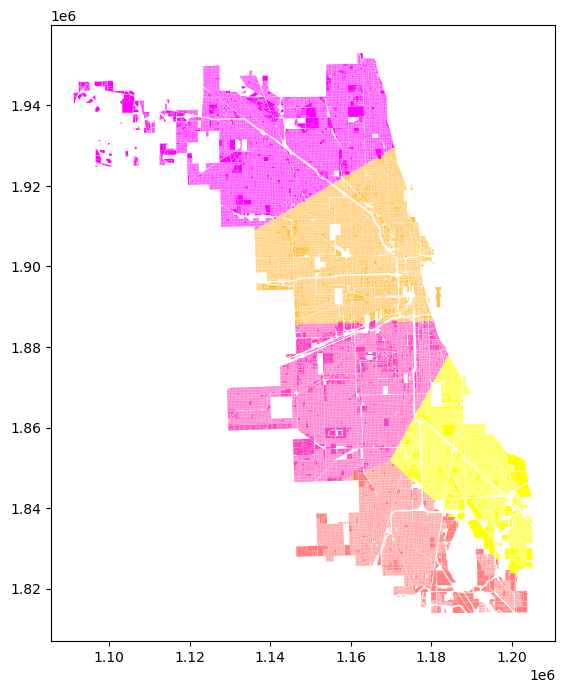

In [ ]:
kmeans_5 = KMeans(n_clusters=5, random_state=42)
ChicagoDataset1['kmeans_cluster_5'] = kmeans_5.fit_predict(ChicagoDataset1[['latitude', 'longitude']])
ChicagoDataset1.plot(column='kmeans_cluster_5', categorical=True, figsize=(8,8), cmap='spring')

Following Map: K-Means Clustering for Chicago Tax Parcels with 6 n clusters

<Axes: >

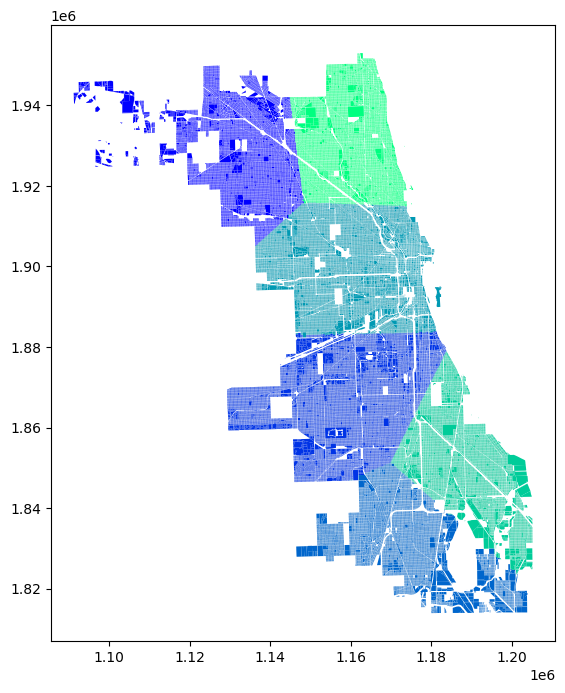

In [ ]:
kmeans_6 = KMeans(n_clusters=6, random_state=42)
ChicagoDataset1['kmeans_cluster_6'] = kmeans_6.fit_predict(ChicagoDataset1[['latitude', 'longitude']])
ChicagoDataset1.plot(column='kmeans_cluster_6', categorical=True, figsize=(8,8), cmap='winter')

Following Map: K-Means Clustering for Chicago Tax Parcels with 7 n clusters

<Axes: >

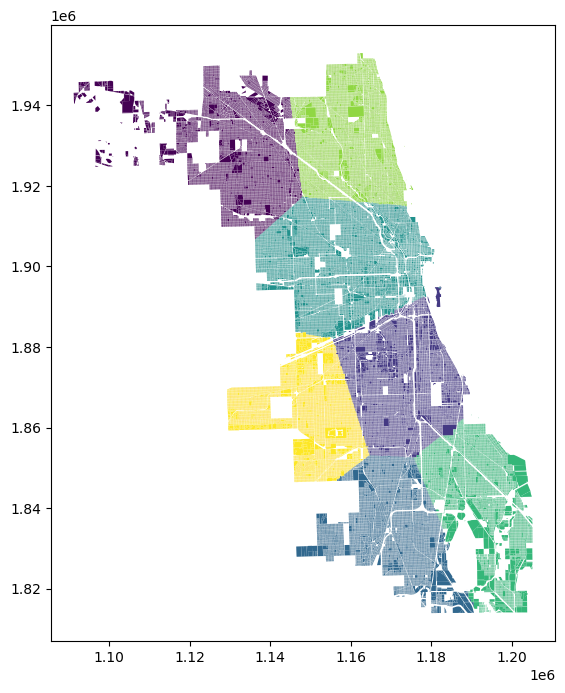

In [ ]:
kmeans_7 = KMeans(n_clusters=7, random_state=42)
ChicagoDataset1['kmeans_cluster_7'] = kmeans_7.fit_predict(ChicagoDataset1[['latitude', 'longitude']])
ChicagoDataset1.plot(column='kmeans_cluster_7', categorical=True, figsize=(8,8), cmap='viridis')

The above charts displays the K-Means Clustering of the Chicago Tax Parcels with different k-values.

**Task 7** Evaluate the clustering results and choose an "optimal" value for n_clusters. Justify your choice in a markdown cell.

The optimal n_cluster value is 7 as the clusters are more descriptive of individual tax parcels.

**Task 8: DBSCAN Clustering - implement the DBSCAN method and experiment with differnet eps values and min_samples in DBSCAN**

In [ ]:
import seaborn as sns
import geopandas as gpd

In [ ]:
# Set up data for reading
ChicagoDataset1.head()

,POLY_ID,ID,AREA,PIN_OLD,PIN,geometry,latitude,longitude,kmeans_cluster_3,kmeans_cluster_4,kmeans_cluster_5,kmeans_cluster_6,kmeans_cluster_7
0,1,93,291771.353794,836300010,836300010,"POLYGON ((1091182.694 1942890.287, 1091173.159...",1.943042e+06,1.091780e+06,0,0,0,0,0
1,2,94,3671.035628,836300011,836300011,"POLYGON ((1092430.298 1943191.955, 1092463.452...",1.943134e+06,1.092427e+06,0,0,0,0,0
2,3,96,447996.710787,836300013,836300013,"POLYGON ((1092323.996 1942962.61, 1092301.306 ...",1.942695e+06,1.091688e+06,0,0,0,0,0
3,4,95,159742.031513,836300012,836300012,"POLYGON ((1092024.119 1942447.762, 1091997.19 ...",1.942343e+06,1.091538e+06,0,0,0,0,0
4,5,92,208978.919092,836300009,836300009,"POLYGON ((1091970.533 1942338.191, 1091929.082...",1.942083e+06,1.091543e+06,0,0,0,0,0


TypeError: 'str' object is not callable

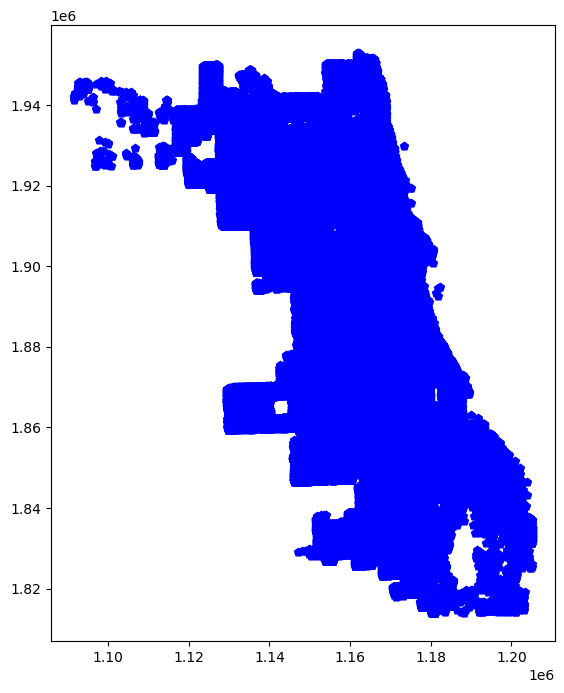

In [ ]:
# Create GeoDataFrame from the synthetic data
geometry = gpd.points_from_xy(ChicagoDataset1['longitude'], ChicagoDataset1['latitude'])
gdf = gpd.GeoDataFrame(ChicagoDataset1, geometry=geometry)

# Visualize the synthetic data
gdf.plot(marker='p', color='blue', figsize=(8, 8))
plt.title('Chicago Tax Parcel DBSCAN')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

TypeError: 'str' object is not callable

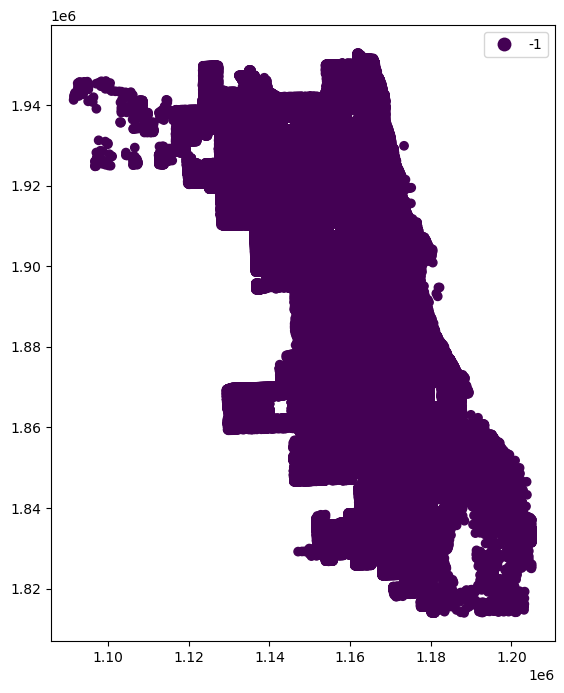

In [ ]:
# Implement DBSCAN clustering
dbscan = DBSCAN(eps=0.8, min_samples=5)
gdf['dbscan_cluster'] = dbscan.fit_predict(gdf[['longitude', 'latitude']])

# Visualize DBSCAN clustering result
gdf.plot(column='dbscan_cluster', categorical=True, legend=True, figsize=(8, 8), cmap='viridis')
plt.title('DBSCAN Clustering Result - With sklearn')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

TypeError: 'str' object is not callable

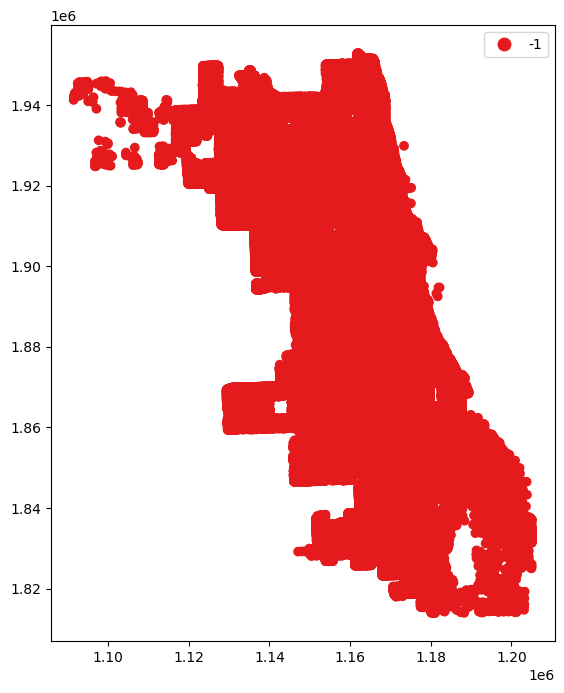

In [ ]:
# Implement DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=8)
gdf['dbscan_cluster'] = dbscan.fit_predict(gdf[['longitude', 'latitude']])

# Visualize DBSCAN clustering result
gdf.plot(column='dbscan_cluster', categorical=True, legend=True, figsize=(8, 8), cmap='Set1')
plt.title('DBSCAN Clustering Result - With sklearn')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

TypeError: 'str' object is not callable

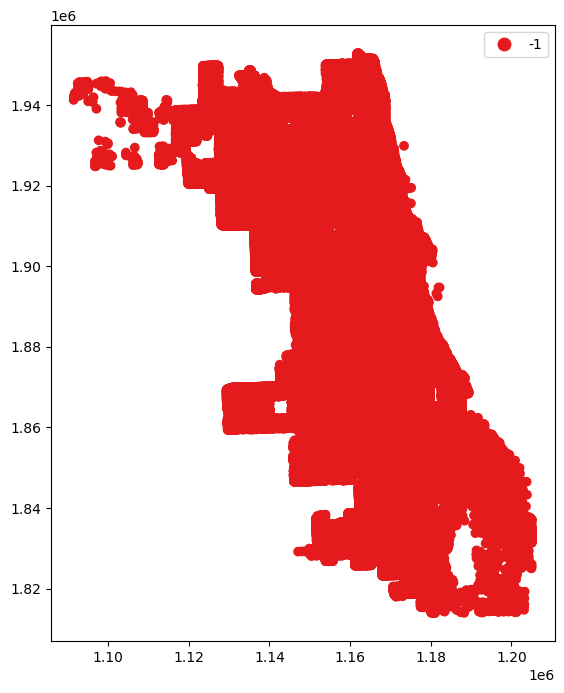

In [ ]:
# Implement DBSCAN clustering
dbscan = DBSCAN(eps=0.2, min_samples=3)
gdf['dbscan_cluster'] = dbscan.fit_predict(gdf[['longitude', 'latitude']])

# Visualize DBSCAN clustering result
gdf.plot(column='dbscan_cluster', categorical=True, legend=True, figsize=(8, 8), cmap='Set1')
plt.title('DBSCAN Clustering Result - With sklearn')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

Task 9: Plot the clustering reuslts for each combination of parameters. Therefore, you should create a plot matrix 3*3

In [ ]:
# Use DBSCAN to plot clusters
def visualize_dbscan_parameters(ChicagoDataset1, epsilon_values, min_samples_values):
  fig, axes = plt.subplots(len(epsilon_values), len(min_samples_values), figsize=(15, 15), sharex=True, sharey=True)
  fig.suptitle('DBSCAN Clustering Parameters')

  for i, epsilon in enumerate(epsilon_values):
    for j, min_samples in enumerate(min_samples_values):
      dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
      ChicagoDataset1['dbscan_cluster'] = dbscan.fit_predict(ChicagoDataset1[['latitude', 'longitude']])
      axes[i, j].scatter(ChicagoDataset1[:,0], ChicagoDataset1[:,1], c=clusters_result, cmap='viridis', alpha=0.7)
      axes[i, j].set_title(f'Epsilon: {epsilon}, Min Samples: {min_samples}')

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Values usage
  epsilon_values = [0.8, 0.5, 0.2]
  min_samples_values = [5, 8, 3]

#visualize the DBSCAN parameters
  visualize_dbscan_parameters(ChicagoDataset1, epsilon_values, min_samples_values)

# Task 10: Use a text cell to write about your insights about the impact of modifying the eps and min_samples parameters, and finally recommend suitable values for eps and min_samples based on your analysis. Consider real-world implications of your findings espeically in the context of urban planning.
 Modifying eps and min_samples parameters is helpful for urban planning because it can help show a variety of options that would work with different variables in different areas. The matrixes are also very efficient, serving as a great tool for analysis. The matrix with esp 0.5 and min_sample 3 shows good variety in the map so I would recommend that based on my analysis.